In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df_household = pd.read_csv('F:/FALL 2021/DA assignment1/Resale flat price/flat-prices1.csv', encoding='ISO-8859-1')
df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45472 entries, 0 to 45471
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                45472 non-null  object 
 1   town                 45472 non-null  object 
 2   flat_type            45472 non-null  object 
 3   block                45472 non-null  object 
 4   street_name          45472 non-null  object 
 5   storey_range         45472 non-null  object 
 6   floor_area_sqm       45472 non-null  float64
 7   flat_model           45472 non-null  object 
 8   lease_commence_date  45472 non-null  int64  
 9   resale_price         45472 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.5+ MB


In [3]:
df_household.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,45472.000000,45472.000000,45472.000000
mean,84.100946,1980.148311,179824.309773
std,21.705133,3.548332,108375.424023
min,31.000000,1967.000000,5600.000000
25%,67.000000,1978.000000,95000.000000
50%,82.000000,1979.000000,160000.000000
75%,92.000000,1981.000000,238000.000000
max,173.000000,1996.000000,720000.000000


In [4]:
df_household.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,KALLANG/WHAMPOA,5 ROOM,103,AH HOOD RD,16 TO 18,122.0,IMPROVED,1981,150000
1,1990-01,KALLANG/WHAMPOA,5 ROOM,103,AH HOOD RD,10 TO 12,118.0,IMPROVED,1981,182000
2,1990-02,KALLANG/WHAMPOA,5 ROOM,101,AH HOOD RD,19 TO 21,118.0,IMPROVED,1981,170000
3,1990-02,KALLANG/WHAMPOA,5 ROOM,103,AH HOOD RD,10 TO 12,118.0,IMPROVED,1981,160000
4,1990-05,KALLANG/WHAMPOA,5 ROOM,101,AH HOOD RD,10 TO 12,118.0,IMPROVED,1981,190000


<AxesSubplot:xlabel='flat_model', ylabel='resale_price'>

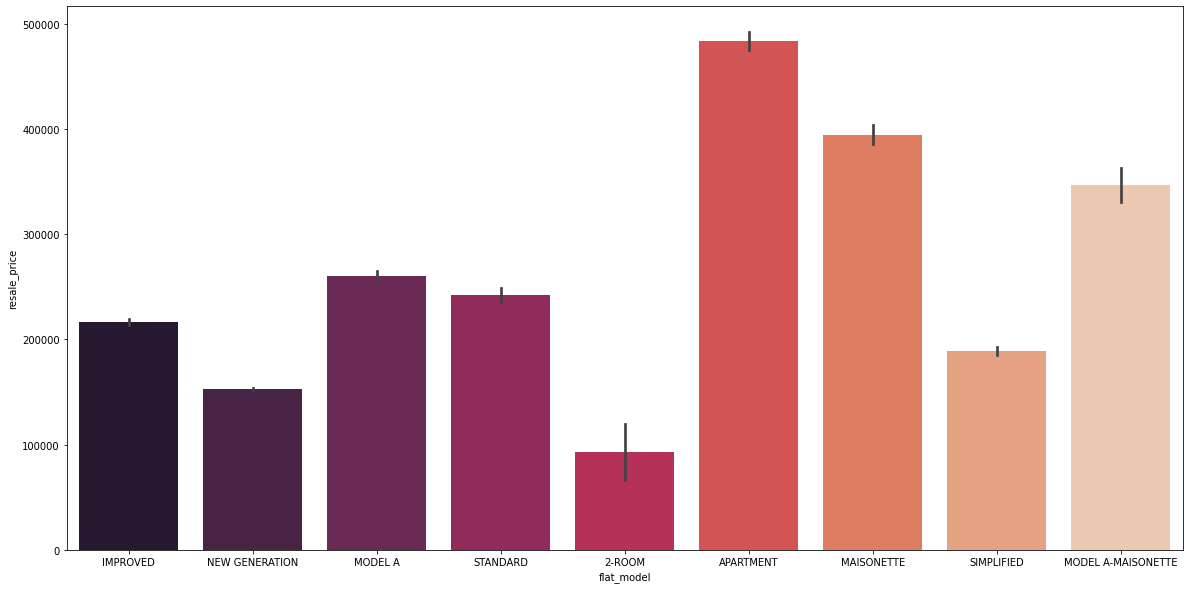

In [5]:
plt.subplots(figsize=(20,10))

sns.barplot(x='flat_model',y = 'resale_price',data = df_household,palette = 'rocket')

In [6]:
#Convert categorical variable into numerical 
from sklearn.preprocessing import LabelEncoder,StandardScaler

label = LabelEncoder()

df_household['town'] = label.fit_transform(df_household['town'])
df_household['flat_type'] = label.fit_transform(df_household['flat_type'])
df_household['street_name'] = label.fit_transform(df_household['street_name'])
df_household['storey_range'] = label.fit_transform(df_household['storey_range'])
df_household['flat_model'] = label.fit_transform(df_household['flat_model'])

In [7]:
df_household.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,6,4,103,0,5,122.0,2,1981,150000
1,1990-01,6,4,103,0,3,118.0,2,1981,182000
2,1990-02,6,4,101,0,6,118.0,2,1981,170000
3,1990-02,6,4,103,0,3,118.0,2,1981,160000
4,1990-05,6,4,101,0,3,118.0,2,1981,190000


In [8]:
# Deal with Outlier with the help of IQR method.
Q1 = df_household['resale_price'].quantile(0.25)
Q3 = df_household['resale_price'].quantile(0.75)
IQR = Q3 - Q1

filter = (df_household['resale_price'] >= Q1 - 1.5 * IQR) & (df_household['resale_price']<= Q3 + 1.5 *IQR)
train2 = df_household.loc[filter]  
print("data loss percentage {}%".format(((len(df_household) - len(train2))/len(df_household))*100))

data loss percentage 2.702762139338494%


In [9]:
print(IQR)

143000.0


In [10]:
X = train2.drop(['month','block','resale_price'],axis = 1)
y = train2['resale_price']

In [11]:
standard = StandardScaler()

std_x = standard.fit_transform(X)

In [12]:
x_final = np.array(std_x)
y_final = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2)


In [14]:
from sklearn.linear_model import LinearRegression as LR
#Linear Regression
model =  LR()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4621470332460381

In [15]:
#make prediction for resale_price in test set
import math
pred_Y = model.predict(X_test)
rmseLR = math.sqrt(((y_test - pred_Y)**2).mean())

In [17]:
#Calculating error for LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
print("R^2: {}".format(model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, pred_Y))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.4582162987856512
Root Mean Squared Error: 69517.04794122624


In [18]:
# Model GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(learning_rate = 0.001,n_estimators = 1000,min_samples_split = 4,min_samples_leaf = 3,max_depth = 7,random_state = 21)

clf.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=7, min_samples_leaf=3,
                          min_samples_split=4, n_estimators=1000,
                          random_state=21)

In [19]:
#make prediction for resale_price in test set
pred_Y_GBR = clf.predict(X_test)
rmseGBR = math.sqrt(((y_test - pred_Y_GBR)**2).mean()) 

In [20]:
#Calculating error for GBR
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred_Y_GBR))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 72319.46628002003


In [21]:
#model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr1 = DecisionTreeRegressor(criterion = 'mae',splitter = 'random',max_depth = 7,min_samples_split = 5,min_samples_leaf = 3,random_state = 100)

dtr1.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mae', max_depth=7, min_samples_leaf=3,
                      min_samples_split=5, random_state=100, splitter='random')

In [22]:
#make prediction for resale_price in test set
pred_Y_DTR = dtr1.predict(X_test)

In [23]:
#Calculating error for DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
rmse = np.sqrt(mean_squared_error(y_test, pred_Y_DTR))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 71304.64869905313
